In [3]:
!pip install geoio
!pip install geopandas

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached geoio-1.3.0-py3-none-any.whl (60 kB)
  Using cached ephem-4.1.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached xmltodict-0.12.0-py2.py3-none-any.whl (9.2 kB)
  Using cached GDAL-3.4.2.tar.gz (757 kB)
  Preparing metadata (setup.py) ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-mpljogay/gdal_c37ed27eec3d4dbca4d80f5aa22f28d5/setup.py'"'"'; __file__='"'"'/tmp/pip-install-mpljogay/gdal_c37ed27eec3d4dbca4d80f5aa22f

In [4]:
from tqdm.notebook import tqdm
from shapely.geometry import shape, mapping, Point, Polygon
import pandas as pd
import numpy as np
#import geoio
import json
import ast
import csv
import os
import re
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely import wkt
from shapely.geometry import Point, Polygon
from shapely.wkt import loads


BASE_DIR = '..'
PATH_INPUT = os.path.join(BASE_DIR, 'data', 'indicadores')
PATH_OUTPUT = os.path.join(BASE_DIR, 'data', 'processed') 

In [5]:
#removing columns from shapefiles
#done!
# df_sp = pd.read_csv(os.path.join(PATH_INPUT, 'setores_censitarios_sp.csv'), sep=";", quotechar='"')
# df_pr = pd.read_csv(os.path.join(PATH_INPUT, 'setores_censitarios_pr.csv'), sep=";", quotechar='"')
#df_vr = pd.read_csv(os.path.join(PATH_INPUT, 'setores_censitarios_vale_ribeira.csv'), sep=";", quotechar='"')

#COLUMNS_TO_IGNORE = ['AGE_MEAN', 'AGE_MEDIAN', 'PERC_LSOA_','DECILE_LSO', 'PERC_LSOA2', 'DECILE_LS2', 'PERC_LSOA3', 'DECILE_LS3','PERC_LSOA4', 'DECILE_LS4']
# df_sp = df_sp.drop(columns=COLUMNS_TO_IGNORE) 
# df_pr = df_pr.drop(columns=COLUMNS_TO_IGNORE) 
#df_vr = df_vr.drop(columns=[ 'ID1', 'ORIG_OGC_F', 'cluster_lon','cluster_lat']) 

# #save
# df_pr.to_csv(os.path.join(PATH_INPUT, 'setores_censitarios_pr.csv'), sep=";", quotechar='"')
# df_sp.to_csv(os.path.join(PATH_INPUT, 'setores_censitarios_sp.csv'), sep=";", quotechar='"')
#df_vr.to_csv(os.path.join(PATH_INPUT, 'setores_censitarios_vale_ribeira.csv'), sep=";", quotechar='"', encoding="utf-8")
 

In [6]:
#joining data shapefiles (the data is in csv instead of shapefile)
# df_sp = pd.read_csv(os.path.join(PATH_INPUT, 'setores_censitarios_sp.csv'), sep=";", quotechar='"')
# print("SHAPE SP: "+str(df_sp.shape))

# df_pr = pd.read_csv(os.path.join(PATH_INPUT, 'setores_censitarios_pr.csv'), sep=";", quotechar='"')
# print("SHAPE PR: "+str(df_pr.shape))
 
# df_ValeRibeira = pd.concat([df_sp, df_pr])
# print("SHAPE JOINED: "+str(df_ValeRibeira.shape))


df = pd.read_csv(os.path.join(PATH_INPUT, 'setores_censitarios_vale_ribeira.csv'), sep=";", quotechar='"')
geo_VR = gpd.GeoDataFrame(df, crs= 'epsg:3857', geometry=[loads(pgon) for pgon in df['WKT']])
print("SHAPE SP: "+str(geo_VR.shape))


SHAPE SP: (954, 15)


In [22]:
df_indicators = pd.read_csv(os.path.join(BASE_DIR,'data', 'IDHMs', 'temp_Renda.csv'))#renda alfabet  longev.
df_indicators['Cod_setor'] = df_indicators['Cod_setor'].astype(str) 
print("SHAPE QUINTIL: "+str(df_indicators.shape))
#remove empty indicators Vale do Ribeira contains 880 available
nan_value = float("NaN")
#Convert NaN values to empty string
df_indicators.replace("", nan_value, inplace=True)
df_indicators.dropna(subset = ["RendaIDHM"], inplace=True)

print("SHAPE QUINTIL: "+str(df_indicators.shape))

#start process cluster 
geo_VR['CD_GEOCODI'] = geo_VR['CD_GEOCODI'].astype(str) 
print("SHAPE CLUSTERS: "+str(geo_VR.shape))

pd_joined_cluster = pd.merge(geo_VR, df_indicators[['Cod_setor','Nome_da_micro', 'Nome_do_municipio','Situacao_setor','RendaIDHM','IDHL-Setor','AlfabIDHM','V002']],  how='right', left_on='CD_GEOCODI', right_on='Cod_setor')
print("SHAPE JOINED CLUSTER: "+str(pd_joined_cluster.shape))

pd_joined_cluster = pd_joined_cluster.rename(columns={'RendaIDHM': 'income', 'IDHL-Setor': 'longevity','AlfabIDHM': 'literacy', 'V002':'population'})
columns_to_show=['WKT','Cod_setor','TIPO','Nome_da_micro','Nome_do_municipio','income','longevity','literacy', 'population']
df_VR_available=pd_joined_cluster[columns_to_show]
df_VR_available

SHAPE QUINTIL: (917, 40)
SHAPE QUINTIL: (880, 40)
SHAPE CLUSTERS: (954, 15)
SHAPE JOINED CLUSTER: (880, 23)


,WKT,Cod_setor,TIPO,Nome_da_micro,Nome_do_municipio,income,longevity,literacy,population
0,"MULTIPOLYGON (((-48.847133 -24.514689,-48.8475...",350270505000001,URBANO,Capão Bonito,APIAÍ,0.606203,0.800000,0.970194,521.0
1,"MULTIPOLYGON (((-48.845799 -24.51313,-48.84650...",350270505000002,URBANO,Capão Bonito,APIAÍ,0.671455,0.850000,0.971920,452.0
2,"MULTIPOLYGON (((-48.844894 -24.517396,-48.8450...",350270505000003,URBANO,Capão Bonito,APIAÍ,0.778504,0.933333,0.975673,299.0
3,MULTIPOLYGON (((-48.850383946118 -24.523331868...,350270505000004,URBANO,Capão Bonito,APIAÍ,0.808376,0.800000,0.939745,358.0
4,"MULTIPOLYGON (((-48.842276 -24.524945,-48.8424...",350270505000005,URBANO,Capão Bonito,APIAÍ,0.545806,0.816667,0.968134,837.0
...,...,...,...,...,...,...,...,...,...
875,MULTIPOLYGON (((-49.3991561913828 -24.70717591...,412863305000009,RURAL,Cerro Azul,DOUTOR ULYSSES,0.400798,0.750000,0.902424,546.0
876,MULTIPOLYGON (((-49.3707349642149 -24.61245860...,412863305000010,RURAL,Cerro Azul,DOUTOR ULYSSES,0.449906,0.783333,0.900085,570.0
877,MULTIPOLYGON (((-49.460651159277 -24.623451408...,412863305000011,RURAL,Cerro Azul,DOUTOR ULYSSES,0.461763,0.783333,0.936782,341.0
878,MULTIPOLYGON (((-49.5334780486908 -24.68126198...,412863305000012,RURAL,Cerro Azul,DOUTOR ULYSSES,0.428022,0.750000,0.885842,451.0


In [23]:
#Find the center point 
gdf = gpd.GeoDataFrame(df_VR_available, crs= 'epsg:3857', geometry=[loads(pgon) for pgon in df_VR_available['WKT']])
gdf3857 = gdf.to_crs(3857)  #coordinates in plain degrees
 

# valores_centroid = rj.centroid.to_crs(epsg=4326)
# valores_centroid
gdf3857['Center_point'] = gdf3857['geometry'].centroid.to_crs(epsg=3857)
# #Extract lat and lon from the centerpoint
gdf3857["lat"] = gdf3857['Center_point'].map(lambda p: p.x)
gdf3857["long"] = gdf3857['Center_point'].map(lambda p: p.y)

gdf3857


,WKT,Cod_setor,TIPO,Nome_da_micro,Nome_do_municipio,income,longevity,literacy,population,geometry,Center_point,lat,long
0,"MULTIPOLYGON (((-48.847133 -24.514689,-48.8475...",350270505000001,URBANO,Capão Bonito,APIAÍ,0.606203,0.800000,0.970194,521.0,"MULTIPOLYGON (((-48.847 -24.515, -48.848 -24.5...",POINT (-48.849 -24.513),-48.848982,-24.513062
1,"MULTIPOLYGON (((-48.845799 -24.51313,-48.84650...",350270505000002,URBANO,Capão Bonito,APIAÍ,0.671455,0.850000,0.971920,452.0,"MULTIPOLYGON (((-48.846 -24.513, -48.847 -24.5...",POINT (-48.847 -24.512),-48.846967,-24.511579
2,"MULTIPOLYGON (((-48.844894 -24.517396,-48.8450...",350270505000003,URBANO,Capão Bonito,APIAÍ,0.778504,0.933333,0.975673,299.0,"MULTIPOLYGON (((-48.845 -24.517, -48.845 -24.5...",POINT (-48.845 -24.515),-48.845093,-24.514756
3,MULTIPOLYGON (((-48.850383946118 -24.523331868...,350270505000004,URBANO,Capão Bonito,APIAÍ,0.808376,0.800000,0.939745,358.0,"MULTIPOLYGON (((-48.850 -24.523, -48.850 -24.5...",POINT (-48.847 -24.519),-48.846954,-24.519240
4,"MULTIPOLYGON (((-48.842276 -24.524945,-48.8424...",350270505000005,URBANO,Capão Bonito,APIAÍ,0.545806,0.816667,0.968134,837.0,"MULTIPOLYGON (((-48.842 -24.525, -48.842 -24.5...",POINT (-48.842 -24.523),-48.841910,-24.522869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,MULTIPOLYGON (((-49.3991561913828 -24.70717591...,412863305000009,RURAL,Cerro Azul,DOUTOR ULYSSES,0.400798,0.750000,0.902424,546.0,"MULTIPOLYGON (((-49.399 -24.707, -49.353 -24.6...",POINT (-49.350 -24.719),-49.350120,-24.719030
876,MULTIPOLYGON (((-49.3707349642149 -24.61245860...,412863305000010,RURAL,Cerro Azul,DOUTOR ULYSSES,0.449906,0.783333,0.900085,570.0,"MULTIPOLYGON (((-49.371 -24.612, -49.368 -24.6...",POINT (-49.385 -24.661),-49.384792,-24.660716
877,MULTIPOLYGON (((-49.460651159277 -24.623451408...,412863305000011,RURAL,Cerro Azul,DOUTOR ULYSSES,0.461763,0.783333,0.936782,341.0,"MULTIPOLYGON (((-49.461 -24.623, -49.460 -24.6...",POINT (-49.441 -24.676),-49.441333,-24.676312
878,MULTIPOLYGON (((-49.5334780486908 -24.68126198...,412863305000012,RURAL,Cerro Azul,DOUTOR ULYSSES,0.428022,0.750000,0.885842,451.0,"MULTIPOLYGON (((-49.533 -24.681, -49.533 -24.6...",POINT (-49.493 -24.679),-49.493091,-24.678702


In [24]:
municipiosVR = ['PARIQUERA-AÇU','RIBEIRA','ITAÓCA','CANANÉIA','ELDORADO','IGUAPE','ILHA COMPRIDA','JACUPIRANGA','IPORANGA','JUQUIÁ','ITARIRI','JUQUITIBA','ITAPIRAPUÃ PAULISTA',
        'MIRACATU','TAPIRAÍ','SÃO LOURENÇO DA SERRA','REGISTRO','SETE BARRAS','PEDRO DE TOLEDO','CAJATI','CERRO AZUL', 'ITAPERUÇU','BOCAIÚVA DO SUL','TUNAS DO PARANÁ',
        'RIO BRANCO DO SUL','BARRA DO TURVO','APIAÍ','BARRA DO CHAPÉU','DOUTOR ULYSSES','ADRIANÓPOLIS']

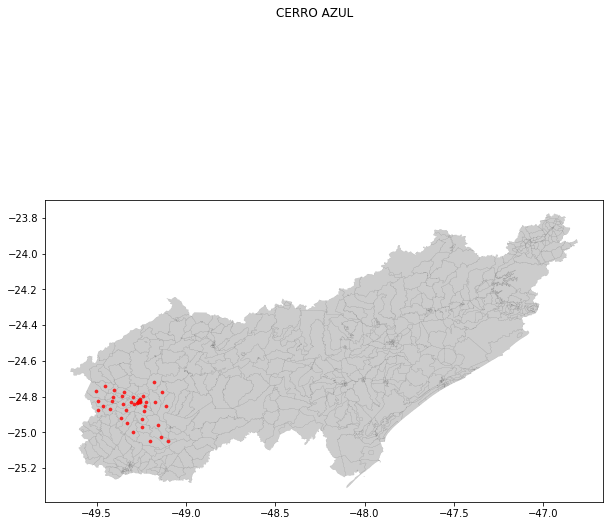

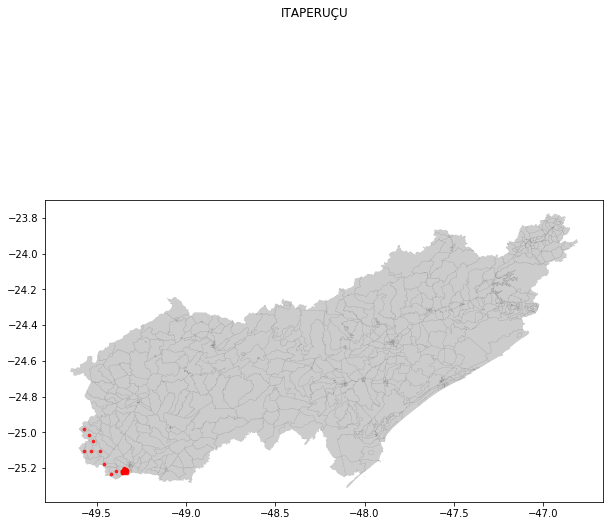

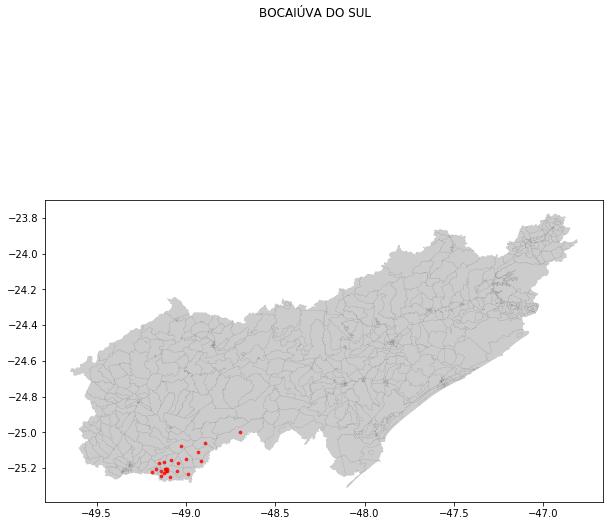

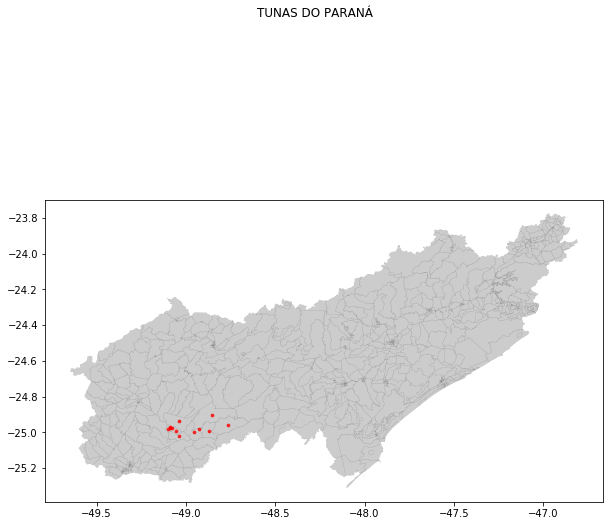

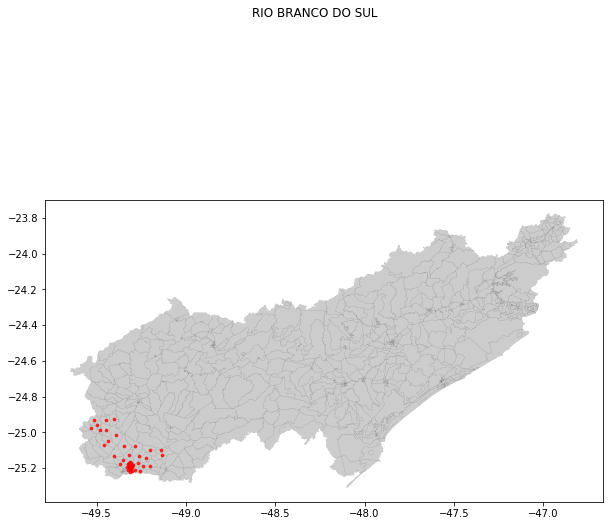

In [25]:
%matplotlib inline
for s in range(20,25):
    fig, ax = plt.subplots(figsize=(10,10))
    #sample='BARRA DO TURVO'
    sample=municipiosVR[s]
    plt.suptitle(sample)
    df_temp= gdf3857[gdf3857['Nome_do_municipio'] == sample]
    geo_VR['geometry'].plot(ax=ax,facecolor='gray',alpha=0.4, edgecolor='black', linewidth=0.1) #contourn 

    plt.scatter(x=df_temp['lat'], y=df_temp['long'],facecolor='red', alpha=0.8, linewidth=0.5, s=10) 

 
    

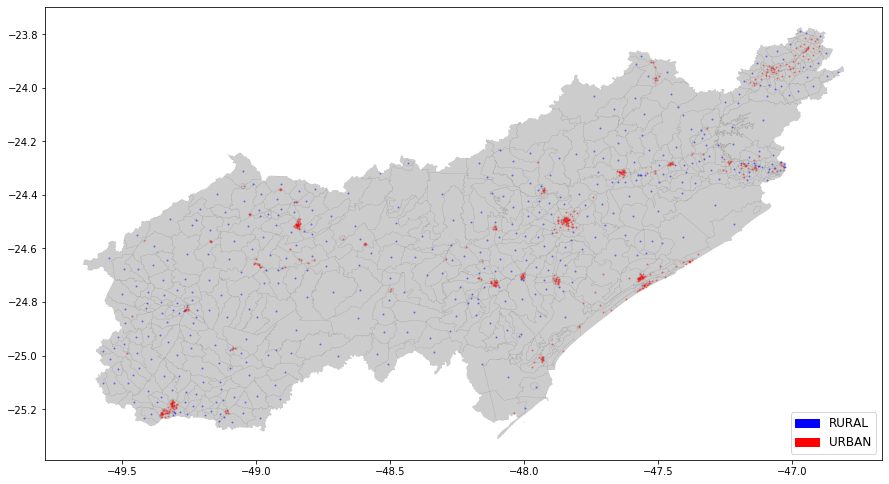

In [26]:
%matplotlib inline
from matplotlib.patches import Patch
fig, ax = plt.subplots(figsize=(15, 15))
# Plot municipality 954 municipalities
geo_VR['geometry'].plot(ax=ax,facecolor='gray',alpha=0.4, edgecolor='black', linewidth=0.1) #contourn 

# Plot centroid of municipality
df1= gdf3857[gdf3857['TIPO'] == 'URBANO']
df2= gdf3857[gdf3857['TIPO'] == 'RURAL']

df1['Center_point'].plot(ax=ax, facecolor='red', alpha=0.5, linewidth=0.1, markersize=3) #URBANO
df2['Center_point'].plot(ax=ax, facecolor='blue', alpha=0.5, linewidth=0.1, markersize=3) #RURAL

ax.legend(handles=[Patch(facecolor='blue', edgecolor='blue',label='RURAL'),\
    Patch(facecolor='red',edgecolor='red', label='URBAN')],\
    loc='lower right',
    fontsize=12)


In [27]:
gdf3857.columns

Index(['WKT', 'Cod_setor', 'TIPO', 'Nome_da_micro', 'Nome_do_municipio',
       'income', 'longevity', 'literacy', 'population', 'geometry',
       'Center_point', 'lat', 'long'],
      dtype='object')

In [28]:
#save csv processed
columns_to_show=['Cod_setor','lat', 'long','TIPO','income','longevity','literacy', 'population']
gdf3857[columns_to_show].to_csv(os.path.join(PATH_OUTPUT, 'VR_clusters.csv'), sep=";", quotechar='"', encoding="utf-8")
  